In [1297]:
import numpy as np
from scipy import linalg
from scipy import signal
from scipy import special

import copy

In [226]:
# Plotting.
import matplotlib.pyplot as plt

import matplotlib.colors as colors
import matplotlib.cm as cm


In [1364]:
from tqdm import notebook

In [811]:
from pathlib import Path

In [812]:
figure_directory = Path("/Users/noahtoyonaga/Documents/2022/coursework_fall_22/AM_254/final_project/final_presentation/figures") 



# Plot 1D array

In [751]:
import math
import numpy as np

def spring_coords(start, end, nodes, width):
    """!
    Return a list of points corresponding to a spring.
    @param r1 (array-like) The (x, y) coordinates of the first endpoint.
    @param r2 (array-like) The (x, y) coordinates of the second endpoint.
    @param nodes (int) The number of spring "nodes" or coils.
    @param width (int or float) The diameter of the spring.
    @return An array of x coordinates and an array of y coordinates.
    """
    x = np.linspace(start, end, nodes)
    y = np.zeros_like(x)
    for i in range(1, nodes-1):
        y[i] = (-1) ** i * width
        
    return x, y

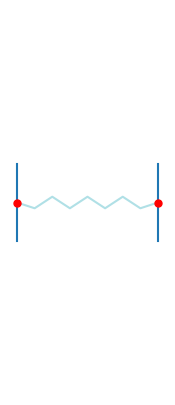

In [765]:
node_count = 2
x0 = np.linspace(0, 1, node_count)

# Make symmetric.
nn_k = np.ones(node_count - 1) / node_count ** 2
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)

spring_locations = np.argwhere(np.triu(k))



fig, ax = plt.subplots(1, 1, figsize=(2, 5))

y0 = np.zeros(node_count)


for x_ in x0:
    ax.axvline(x_, ymin=.4, ymax = .6)

for sl in spring_locations:
    x, y = spring_coords(x0[sl[0]], x0[sl[1]], 9, .03)
    ax.plot(x, y, color = 'powderblue')
    
    
    # Plot nodes
ax.plot(x0, y0, 'ro', ms=5)


ax.set_ylim(-1, 1)

ax.set_axis_off()




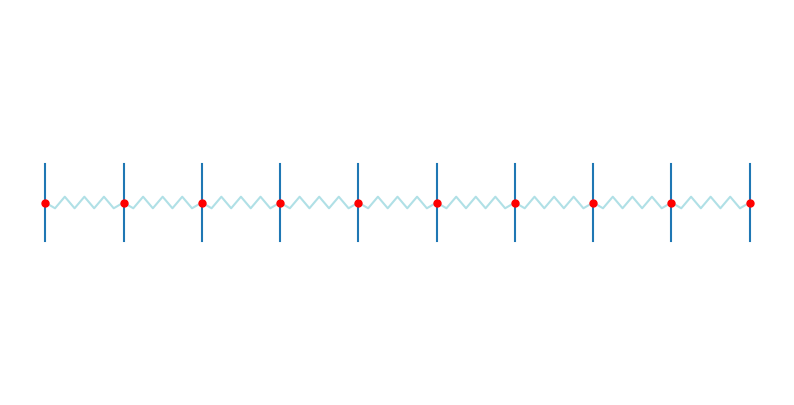

In [760]:
node_count = 10
x0 = np.linspace(0, 1, node_count)

# Make symmetric.
nn_k = np.ones(node_count - 1) / node_count ** 2
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)

spring_locations = np.argwhere(np.triu(k))



fig, ax = plt.subplots(1, 1, figsize=(10, 5))

y0 = np.zeros(node_count)


for x_ in x0:
    ax.axvline(x_, ymin=.4, ymax = .6)

for sl in spring_locations:
    x, y = spring_coords(x0[sl[0]], x0[sl[1]], 9, .03)
    ax.plot(x, y, color = 'powderblue')
    
    
    # Plot nodes
ax.plot(x0, y0, 'ro', ms=5)


ax.set_ylim(-1, 1)

ax.set_axis_off()



# Normal spectrum

In [771]:
node_count = 100
k_noise_max = .0001

# Make symmetric.
nn_k = np.ones(node_count - 1) / node_count ** 2
k_nn = np.diag(nn_k, 1) + np.diag(nn_k, -1)

# Create force matrix.
M = stiffness_to_force(k_nn)
M = fix_boundary(M)

# Find eigenvalues.
e, v = linalg.eigh(M)

v= np.pad(v, [[1,1], [0,0]])

v_plot = np.transpose(v)



Text(0.5, 0.98, 'Eigenvalues of $A_0$ (N=100)')

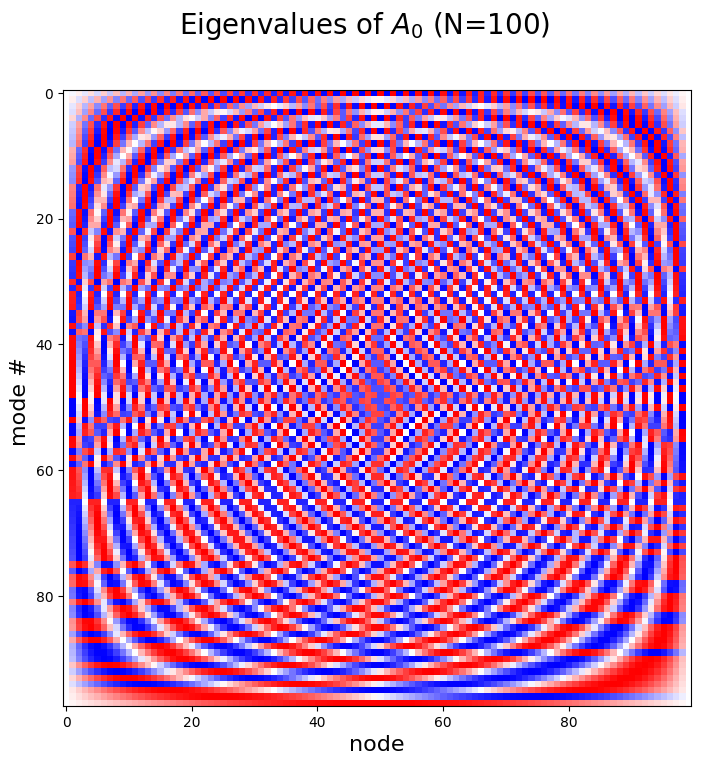

In [784]:

fig, ax = plt.subplots(1, 1, figsize=(10,8))

p = ax.imshow(
    v_plot,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
# fig.colorbar(p, ax=ax)

ax.set_ylabel("mode # ", fontsize=16)
ax.set_xlabel("node", fontsize=16)
fig.suptitle("Eigenvalues of $A_0$ (N=100)", fontsize = 20)


# potential noise

In [844]:
def stiffness_to_force(K):
    """Converts stiffness matrix to linear force.
    
    The stiffness matrix is a symmetric matrix with 0 on the
    main diagonal (as no bonds can exist between the same node).

    
    """
    # diagonal of force matrix.
    F_diag = np.diag(np.sum(K, axis=-1))
    
    # off diagional elements.
    F_off = np.transpose(K) 
    
    return - F_diag + F_off

def fix_boundary(M):
    """Fixing boundary of `M` results in setting force to zero."""
    return M[1:-1, 1:-1]


In [905]:
node_count = 100

# Potential noise
potential_downsample_factor = 5
potential_noise_max = 1 / node_count ** 2 * .2


# Make symmetric.
nn_k = np.ones(node_count - 1) / node_count ** 2
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)


# POTENTIAL NOISE
# Add potential noise\
noise_grid_count = int(node_count / potential_downsample_factor)
noise_vec = np.random.rand(noise_grid_count) * potential_noise_max
noise_vec = noise_vec.repeat(potential_downsample_factor)
potential_noise = np.diag(noise_vec)


# Create force matrix.
M = stiffness_to_force(k) + potential_noise


# Boundary conditions.
M = fix_boundary(M)


# Find eigenvalues.
e, v = linalg.eigh(M)


v= np.pad(v, [[1,1], [0,0]])


v_plot = np.transpose(v)
# effective valley network.
u = get_valley(M)



Text(0.5, 1.0, 'Anderson Random Potential')

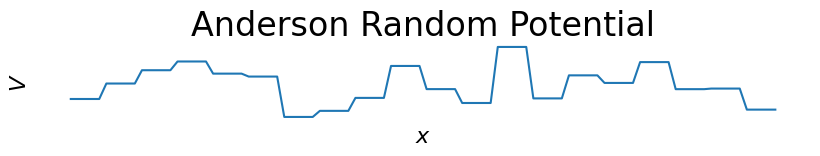

In [906]:
fig, ax = plt.subplots(1,1, figsize=(10, 1))
ax.plot(noise_vec)
plt.box(False)
ax.set_ylabel("$V$", fontsize=16)
ax.set_xlabel("$x$", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(axis='both', which='both',length=0)

ax.set_title("Anderson Random Potential", fontsize=24)

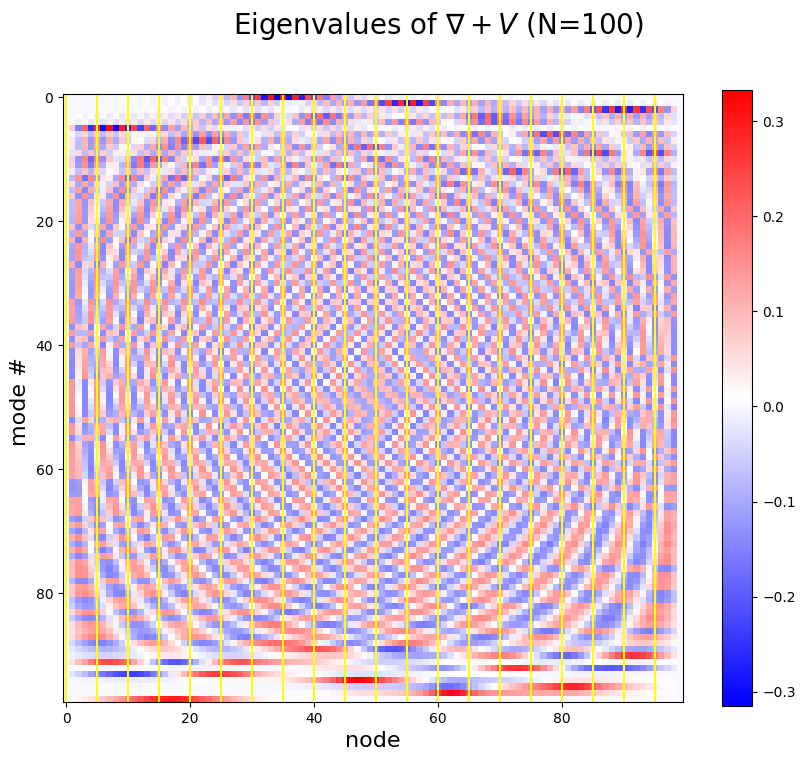

In [907]:
v_plot = np.transpose(v)

fig, ax = plt.subplots(1, 1, figsize=(10,8))

p = ax.imshow(
    v_plot,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
fig.colorbar(p, ax=ax)

ax.set_ylabel("mode # ", fontsize=16)
ax.set_xlabel("node", fontsize=16)
fig.suptitle("Eigenvalues of $\\nabla + V$ (N=100)", fontsize = 20)


for b in range(0, node_count, potential_downsample_factor):
    ax.axvline(b, color="yellow")

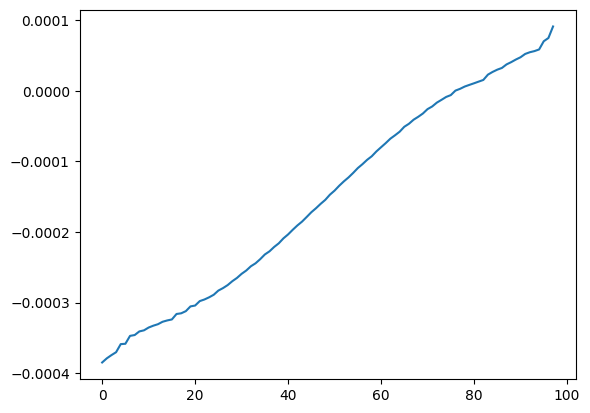

In [934]:
plt.plot(e)

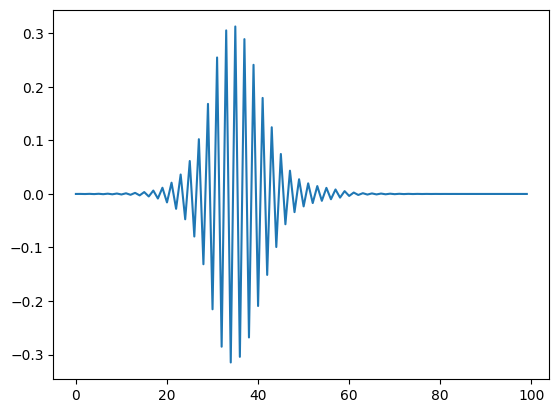

In [908]:
# find peaks.
peak_location, peak_description = signal.find_peaks(np.abs(v_plot[0]), prominence=.4)
peak_location

plt.plot(v_plot[0])
for p in peak_location:
    plt.axvline(p, color='yellow')
    

In [344]:
# # find peaks.
# peak_location, peak_description = signal.find_peaks(np.abs(v_plot[0]), prominence=.4)
# peak_location

# plt.plot(v_plot[0][peak_location[0] - 10: peak_location[0] + 10])
    

Text(0.5, 0.98, 'Leading Eigenmodes')

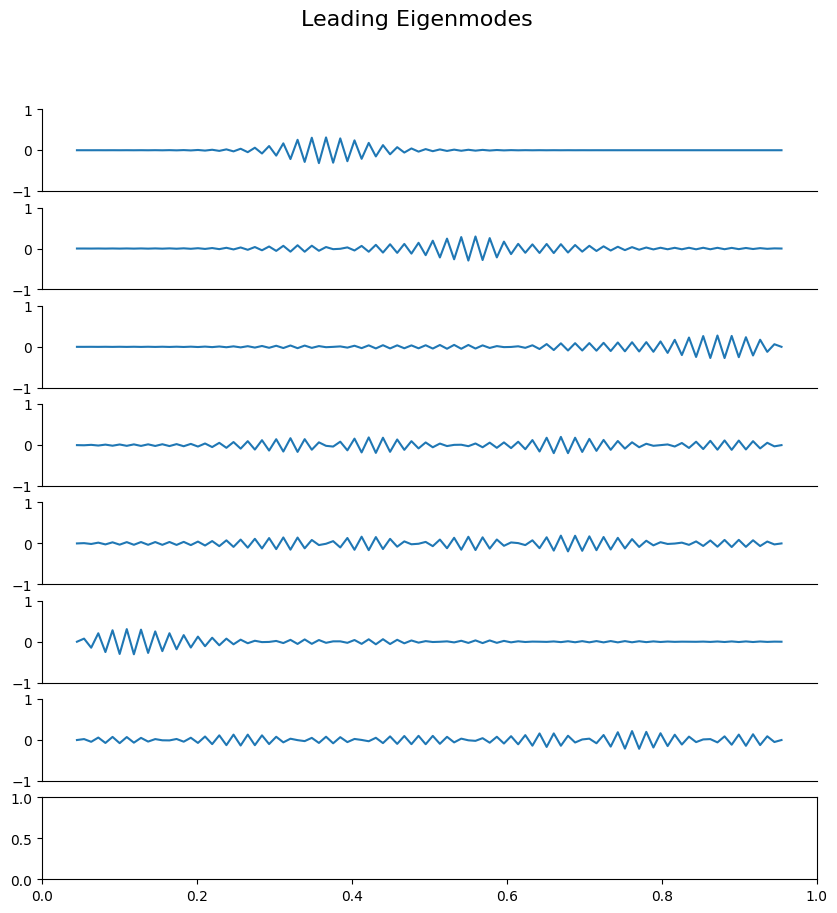

In [909]:
mode_count = 8

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

for i in range(0, mode_count-1):
    ax[i].plot(v_plot[i])
#     ax[i].plot(np.abs(u) / np.abs(u).max())
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
fig.suptitle("Leading Eigenmodes", fontsize=16)

Text(0.5, 0.98, 'Lowest Eigenmodes')

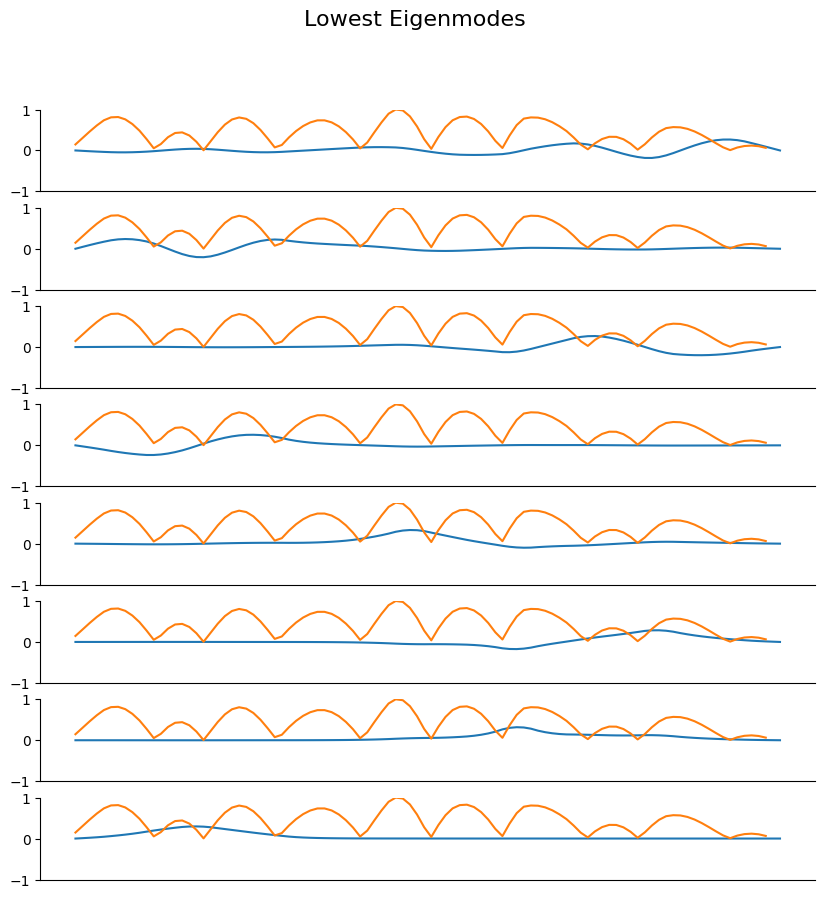

In [910]:
mode_count = 8

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

modes = range(node_count - 2 - mode_count, node_count - 2)

for i, m in enumerate(modes):
    ax[i].plot(v_plot[m])
    ax[i].plot(np.abs(u) / np.abs(u).max())
    ax[i].set_ylim(-1, 1)
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
fig.suptitle("Lowest Eigenmodes", fontsize=16)

# pure bond noise

In [1288]:
node_count = 900

bandwidth = 10

# RBM
k = np.random.normal(size=(node_count, node_count)) / np.sqrt(1 + 2 *  bandwidth)
k = np.triu(k) - np.triu(k, bandwidth)
k = k + np.transpose(k)

# spectrum of rbm
e_k, v_k = linalg.eigh(fix_boundary(k))

np.fill_diagonal(k, 0.)

# Boundary conditions.
M = stiffness_to_force(k) 
M = fix_boundary(M)


# Find eigenvalues.
e, v = linalg.eigh(M)


v_plot = np.transpose(v)
v_k_plot = np.transpose(v_k)

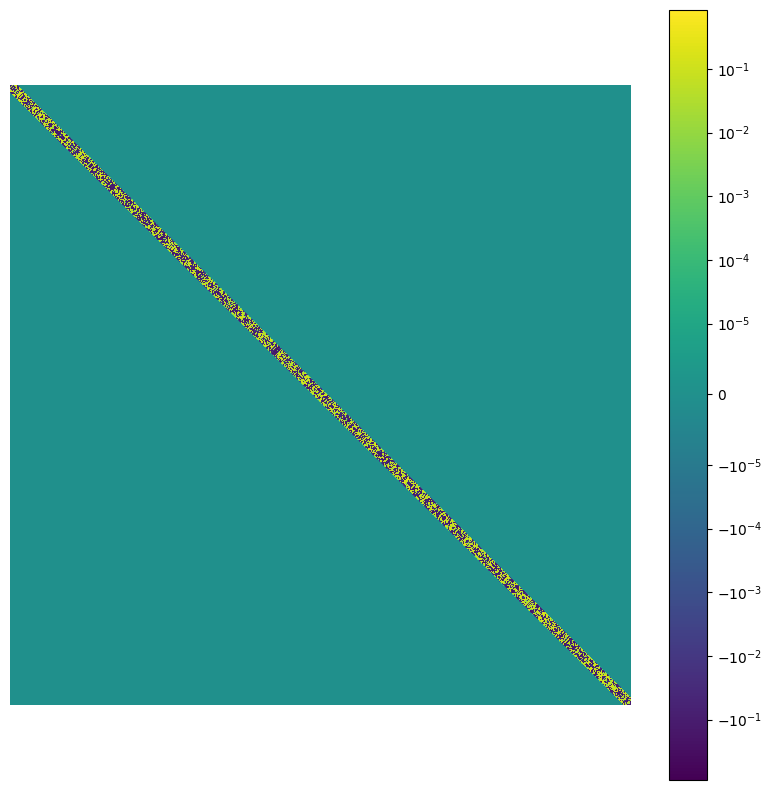

In [1289]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

m = ax.imshow(k, 
    norm=colors.SymLogNorm(linthresh=1e-5),
)
plt.colorbar(m)
ax.set_axis_off()


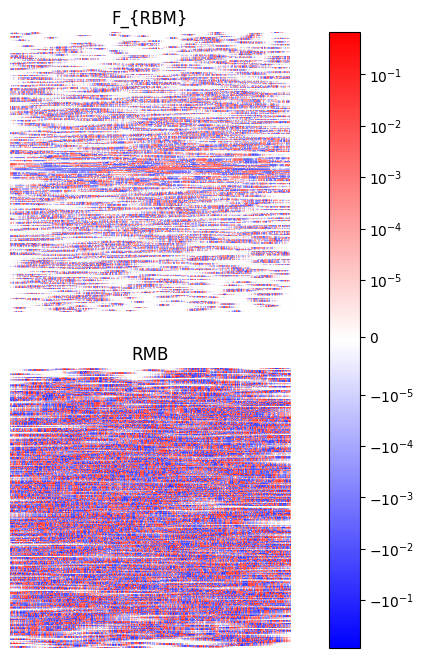

In [1290]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))

p = ax[0].imshow(
    v_plot,
    norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
ax[0].set_axis_off()
ax[0].set_title("F_{RBM}")





p = ax[1].imshow(
    v_k_plot,
    norm=colors.SymLogNorm(linthresh=1e-5),
    cmap='bwr',
)
ax[1].set_axis_off()
ax[1].set_title("RMB")




fig.colorbar(p, ax=ax)



array([[ 1.47677961e-37,  8.46932213e-18,  5.28512627e-19, ...,
         1.06567811e-56, -3.03985102e-56, -3.79342977e-56],
       [ 0.00000000e+00, -5.44151178e-18,  7.86078149e-18, ...,
         2.00689836e-05, -6.20019577e-05, -7.51040366e-05],
       [ 0.00000000e+00,  5.65401186e-18, -2.69932200e-17, ...,
         7.13118411e-23, -2.12064276e-22, -2.60621193e-22],
       ...,
       [ 0.00000000e+00, -2.25155485e-18, -8.11230694e-18, ...,
         1.16485029e-17, -1.75702161e-17, -1.07624005e-17],
       [-1.16962382e-04, -3.28366017e-04,  5.13467486e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.05723452e-18, -3.72366462e-17, -4.55082157e-16, ...,
         2.95044860e-69, -4.80008513e-69, -2.95736135e-69]])

0.061148355133520516

In [1197]:
x = np.linspace(-2, 2, 20)
dx = x[1]-x[0]
theory = (4 - x ** 2) ** (1/2) * dx

Text(0.5, 1.0, '$k$ $\\lambda$ distribution')

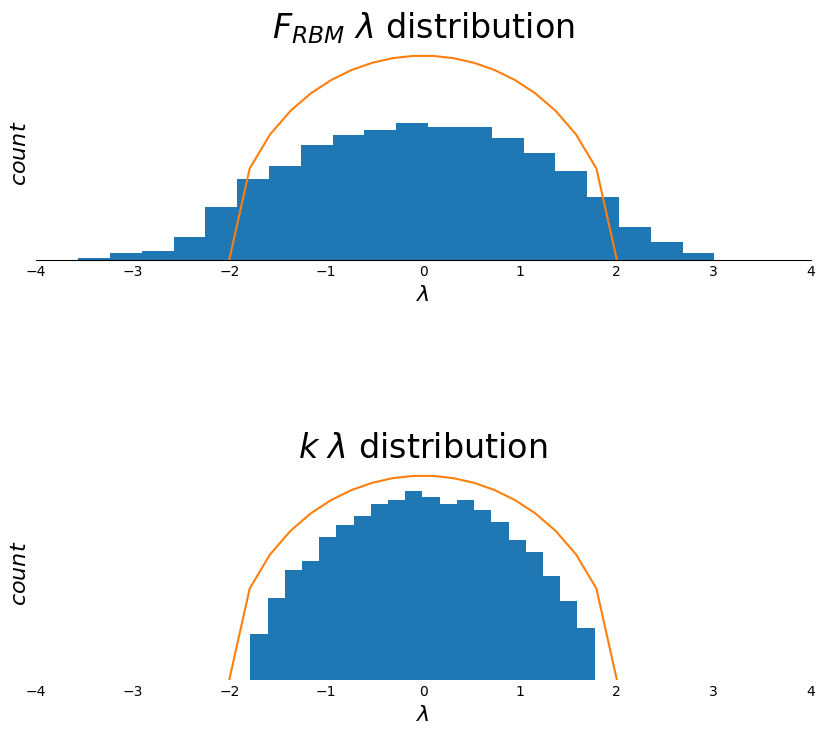

In [1198]:
fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].hist(e, density=True, bins=20)
ax[0].plot(x,theory)
ax[0].set_xlim(-4,4)
ax[0].set_aspect(5)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[0].set_ylabel("$count$", fontsize=16)
ax[0].set_xlabel("$\lambda$", fontsize=16)
ax[0].set_yticks([])
ax[0].tick_params(axis='both', which='both',length=0)

ax[0].set_title("$F_{RBM}$ $\lambda$ distribution", fontsize=24)


ax[1].hist(e_k, density=True, bins=20)
ax[1].plot(x,theory)
ax[1].set_xlim(-4,4)
ax[1].set_aspect(5)

plt.box(False)

ax[1].set_ylabel("$count$", fontsize=16)
ax[1].set_xlabel("$\lambda$", fontsize=16)
# ax.set_xticks([])
ax[1].set_yticks([])
ax[1].tick_params(axis='both', which='both',length=0)

ax[1].set_title("$k$ $\lambda$ distribution", fontsize=24)




Text(0.5, 1.0, '$k$ $\\lambda$ distribution')

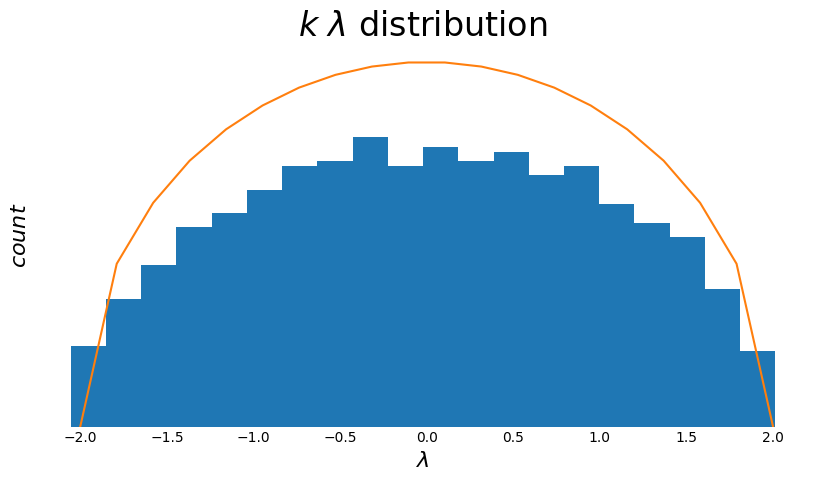

In [1175]:
fig, ax = plt.subplots(1,1, figsize=(10,10))


ax.hist(e_k, density=True, bins=20)
ax.plot(x,theory)
ax.set_aspect(5)

plt.box(False)

ax.set_ylabel("$count$", fontsize=16)
ax.set_xlabel("$\lambda$", fontsize=16)
# ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(axis='both', which='both',length=0)

ax.set_title("$k$ $\lambda$ distribution", fontsize=24)



# Localization

In [1324]:

def get_rbm(node_count, bandwidth):
    k = np.random.normal(size=(node_count, node_count)) / np.sqrt(1 + 2 *  bandwidth)
    k = np.triu(k) - np.triu(k, bandwidth)
    return k + np.transpose(k)

def get_rbm_F(node_count, bandwidth):
    # spectrum of rbm
    k = get_rbm(node_count, bandwidth)
    np.fill_diagonal(k, 0.)

    # Boundary conditions.
    M = stiffness_to_force(k) 
    return M

In [1325]:
def gaussian_entropy(node_count):
    # GOE length.
    return special.digamma(.5 * node_count + 1) - special.digamma(3/2)

In [1463]:
def localization(u):
    u = u + 1e-20
    u = u /  np.sqrt(np.sum(u **2, axis=-1, keepdims=True))

    # Localization.
    return -1 * np.sum(u ** 2 * np.log(u ** 2), axis = -1)


def mean_localization_length(H, node_count):
    H_mean = np.mean(H)
    H_GOE = gaussian_entropy(node_count)
    return node_count * np.exp(H_mean - H_GOE)

In [1429]:
node_count = 900

band_width_test = np.arange(2, 150, 5)
beta_RBM = []
for W in notebook.tqdm(band_width_test):
    
    # Get rbm.
    k = get_rbm(node_count, W)
    
    # Compute spectrum.
    e_k, v_k = linalg.eigh(fix_boundary(k))
    
    v_k = np.transpose(v_k)
    
    # compute localization
    H = localization(v_k)
    
    
    # Compute mean
    beta_RBM.append(mean_localization_length(H, node_count) / node_count)



  0%|          | 0/30 [00:00<?, ?it/s]

In [1431]:
beta_A = []
for W in notebook.tqdm(band_width_test):
    
    # Get rbm.
    k = get_rbm_F(node_count, W)
    
    # Compute spectrum.
    e_k, v_k = linalg.eigh(fix_boundary(k))
    
    v_k = np.transpose(v_k)

    # compute localization
    H = localization(v_k)
    
    # Compute mean
    beta_A.append(mean_localization_length(H, node_count) / node_count)




  0%|          | 0/30 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Rescaled Mean Localization')

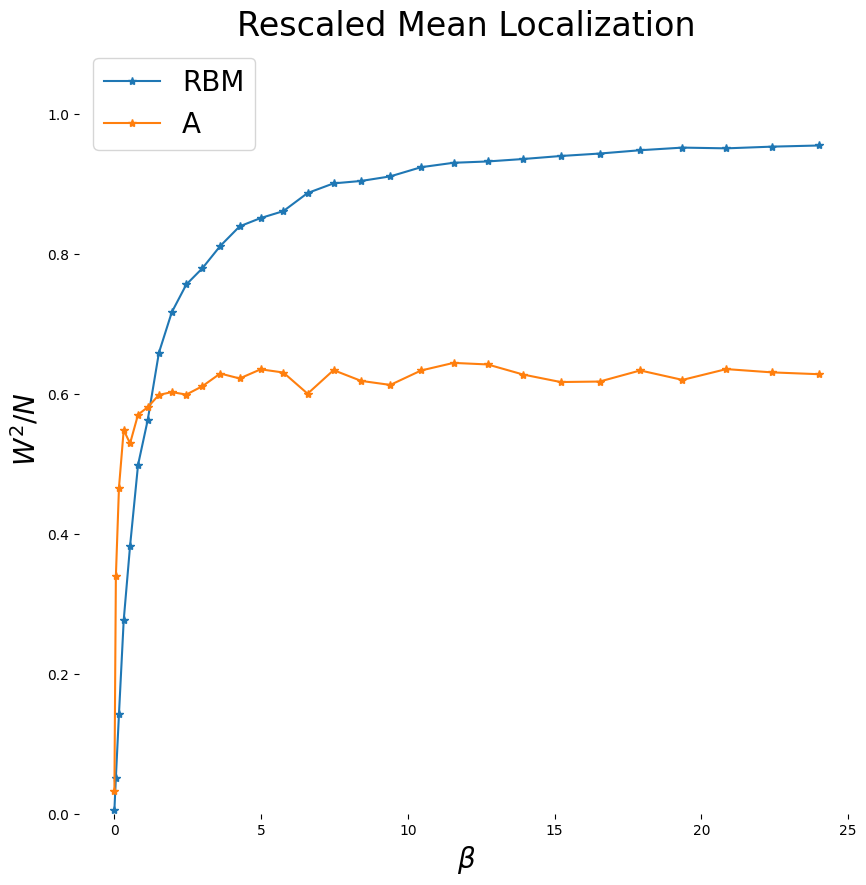

In [1432]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(band_width_test ** 2 / node_count, beta_RBM, marker = "*", label="RBM")
ax.plot(band_width_test ** 2 / node_count, beta_A, marker = "*", label="A")

ax.set_ylim(0, 1.1)

plt.box(False)
ax.legend(fontsize=20)
ax.set_xlabel("$\\beta$", fontsize=20)
ax.set_ylabel("$W ^2 / N$", fontsize=20)
ax.set_title("Rescaled Mean Localization", fontsize=24)

# Localization as function of coordination number

In [1603]:
def get_a_fixed_z(node_count, z):
    k = np.random.normal(size=(node_count, node_count)) / np.sqrt(z)
    k = k * np.random.binomial(1, p=z / (node_count - 1), size=(node_count, node_count))
    k = np.triu(k)
    return k + np.transpose(k)

def get_z_F(node_count, z):
    # spectrum of rbm
    k = get_a_fixed_z(node_count, z)
    np.fill_diagonal(k, 0.)

    # Boundary conditions.
    M = stiffness_to_force(k) 
    return M

def get_k_poisson(node_count):
    nn_k = np.ones(node_count - 1) 
    return np.diag(nn_k, 1) + np.diag(nn_k, -1)


def mean_min_localization(H, node_count):
    H_min = np.min(H)
    H_GOE = gaussian_entropy(node_count)
    return node_count * np.exp(H_min - H_GOE)   

def localization(u):
    u = u + 1e-20
    u = u /  np.sqrt(np.sum(u **2, axis=-1, keepdims=True))

    
    # Localization.
    return -1 * np.sum(u ** 2 * np.log(u ** 2), axis = -1)



In [1604]:
node_count = 100


k =  get_k_poisson(node_count) / node_count ** 2
k = stiffness_to_force(k)

# Compute spectrum.
e_k, v_k = linalg.eigh(fix_boundary(k))

v_plot = np.transpose(v_k)

# # compute localization
H = localization(np.transpose(v_k))

beta =mean_localization_length(H, node_count) / node_count

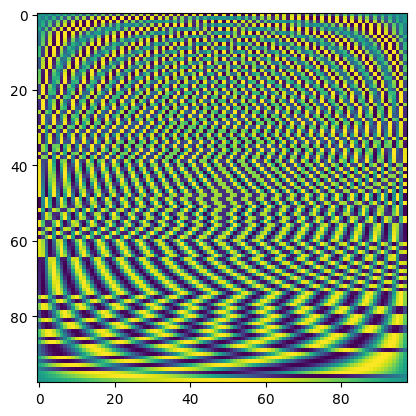

In [1600]:
plt.imshow(v_plot)

In [1601]:
import pandas as pd
import seaborn as sns

In [1648]:
node_count = 500

z_test = np.arange(1, 30, 2)
theta_test = np.linspace(-3, 1, 25)
theta_test = 10 ** (theta_test)

data=[]
for theta in notebook.tqdm(theta_test):
    for z in notebook.tqdm(z_test):
        
        k = get_a_fixed_z(node_count, z)
        np.fill_diagonal(k, 0.)
        k =  k +  theta * get_k_poisson(node_count)
        k = stiffness_to_force(k)

        # Compute spectrum.
        e_k, v_k = linalg.eigh(fix_boundary(k))

    #     # compute localization
        H = localization(np.transpose(v_k))

    #     # Compute mean
        min_ = mean_min_localization(H, node_count) / node_count
        mean_ = mean_localization_length(H, node_count) / node_count

        data.append([z, theta, min_, mean_])



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [1609]:
df = pd.DataFrame(data, columns=['z', 'theta', 'min', 'mean'])

Text(0.5, 1.0, 'Random connections')

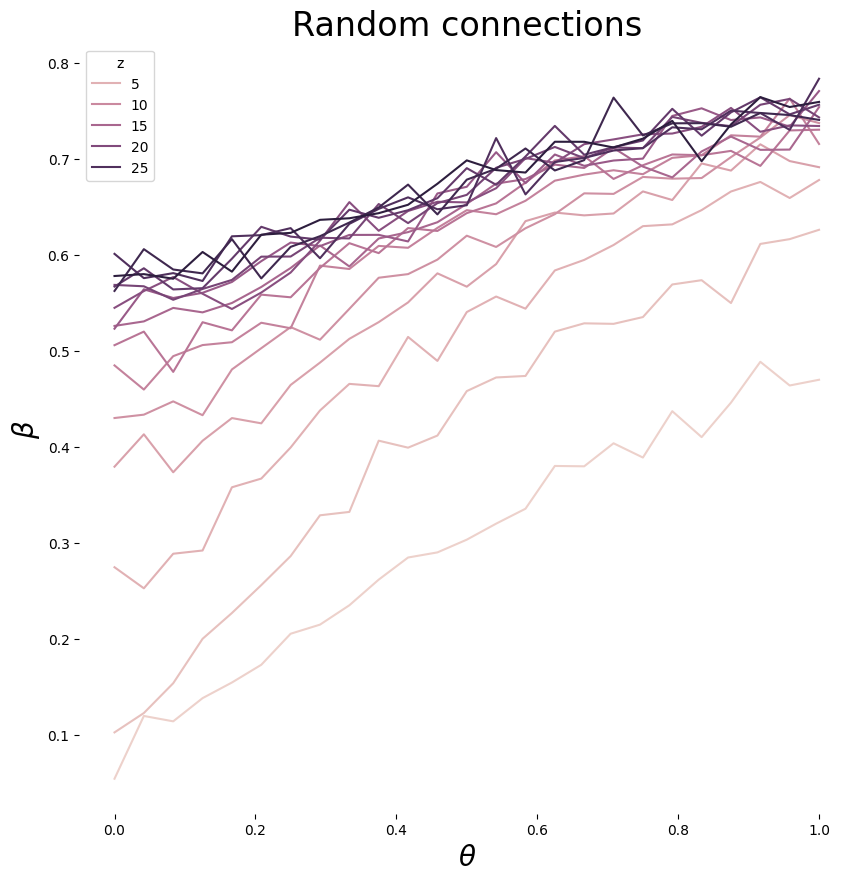

In [1651]:
fig, ax = plt.subplots(1,1,figsize=(10,10))


sns.lineplot(df, x = 'theta', y='mean', hue='z', ax=ax)
plt.box(False)

ax.set_xlabel("$\\theta$", fontsize=20)
ax.set_ylabel("$\\beta$", fontsize=20)
ax.set_title("Random connections", fontsize=24)

In [1657]:
df["theta"][21]

0.041666666666666664

In [1658]:
node_count = 500
z = 1
theta = .1


k = get_a_fixed_z(node_count, z)
np.fill_diagonal(k, 0.)
k =  k +  theta * get_k_poisson(node_count)
k = stiffness_to_force(k)

# Compute spectrum.
e_k, v_k = linalg.eigh(fix_boundary(k))

v_k_plot = np.transpose(v_k)

Text(0.5, 1.0, 'z = 1, $\\theta$: 0.1')

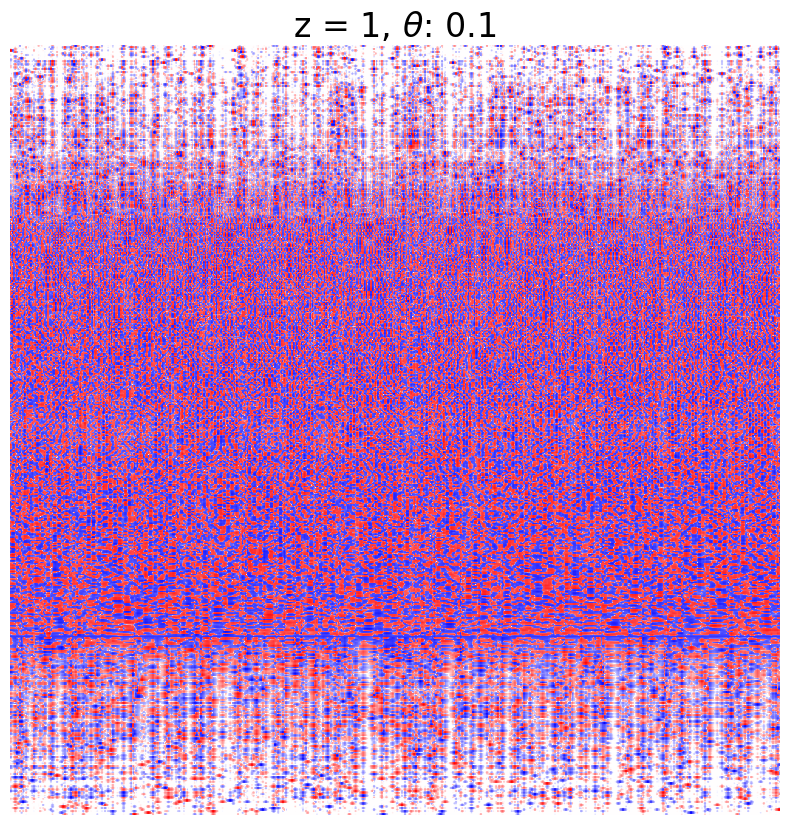

In [1659]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))


p = ax.imshow(
    v_k_plot,
    norm=colors.SymLogNorm(linthresh=1e-5),
    cmap='bwr',
)
ax.set_axis_off()
ax.set_title(f"z = {z}, $\\theta$: {theta}", fontsize=24)




# bond noise

In [1141]:

def add_bond(k, bond_pair, k_new, replace=True):
    if replace:
        k_new = k_new
    else:
        k_new = k_new + k[tuple(bond_pair)]
    k[tuple(bond_pair)] = k[tuple(bond_pair[::-1])] = k_new
    return k

def get_valley(M):
    node_count = M.shape[0]
    rhs = np.ones(node_count)
    return np.matmul(linalg.inv(M), rhs)

In [1286]:
node_count = 100

theta = .1
sigma = .1

# Potential noise
potential_downsample_factor = 10
potential_noise_max = 1 

# Make poisson.
nn_k = np.ones(node_count - 1) 
k_n = np.diag(nn_k, 1) + np.diag(nn_k, -1)


# POTENTIAL NOISE
# Add potential noise\
noise_grid_count = int(node_count / potential_downsample_factor)
noise_vec = np.random.rand(noise_grid_count) * potential_noise_max
noise_vec = noise_vec.repeat(downsample_factor)
potential_noise = np.diag(noise_vec)


# RBM
k_rbm = np.random.normal(size=(node_count, node_count)) / np.sqrt(1 + 2 *  bandwidth)
k_rbm = np.triu(k_rbm) - np.triu(k_rbm, bandwidth)
k_rbm = k_rbm + np.transpose(k_rbm)
np.fill_diagonal(k_rbm, 0.)


# Create force matrix.
M_rbm = stiffness_to_force(k_rbm)
M_n = stiffness_to_force(k_n)

# Boundary conditions.
M_n = fix_boundary(M_n)
M_rbm = M_n + theta * fix_boundary(M_rbm)
potential_noise = fix_boundary(potential_noise)
M_A = M_n + sigma * potential_noise
M = M_n + theta * M_rbm + sigma * potential_noise

# Find eigenvalues.
e, v = linalg.eigh(M)
e_a, v_a =  linalg.eigh(M_A)
e_rbm, v_rbm = linalg.eigh(M_rbm)
e_n, v_n = linalg.eigh(M_n)

v_n_plot = np.transpose(v_n)
v_a_plot = np.transpose(v_a)
v_rbm_plot = np.transpose(v_rbm)
v_plot = np.transpose(v)


Text(0.5, 0.98, '$\\theta = 0.1$, $\\sigma = 0.1$')

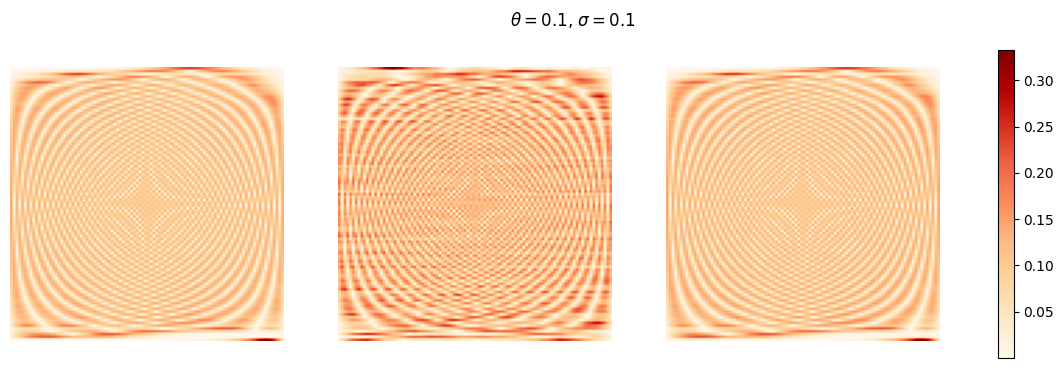

In [1287]:

fig, ax = plt.subplots(1, 3, figsize=(15,4))

p = ax[0].imshow(
    np.abs(v_a_plot),
    cmap='OrRd',
)
p = ax[1].imshow(
    np.abs(v_rbm_plot) ,
    cmap='OrRd',
)
p = ax[2].imshow(
    np.abs(v_plot) ,
    cmap='OrRd',
)

[a.set_axis_off() for a in ax]

fig.colorbar(p, ax=ax)
fig.suptitle(f"$\\theta = {theta}$, $\sigma = {sigma}$")


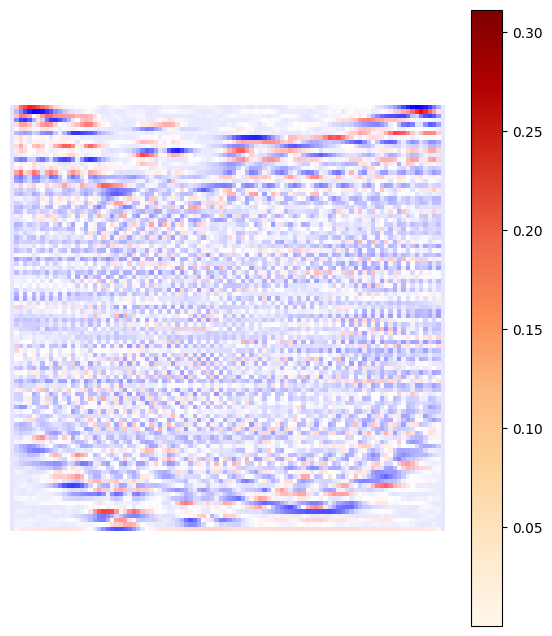

In [1278]:
fig, ax = plt.subplots(1,1, figsize=(7,8))
ax.imshow(
    v_difference ,
#     norm=colors.SymLogNorm(linthresh=.001),
 
    cmap='bwr',
)
fig.colorbar(p, ax=ax)


ax.set_axis_off()

Text(0.5, 0.98, 'Leading Eigenmodes')

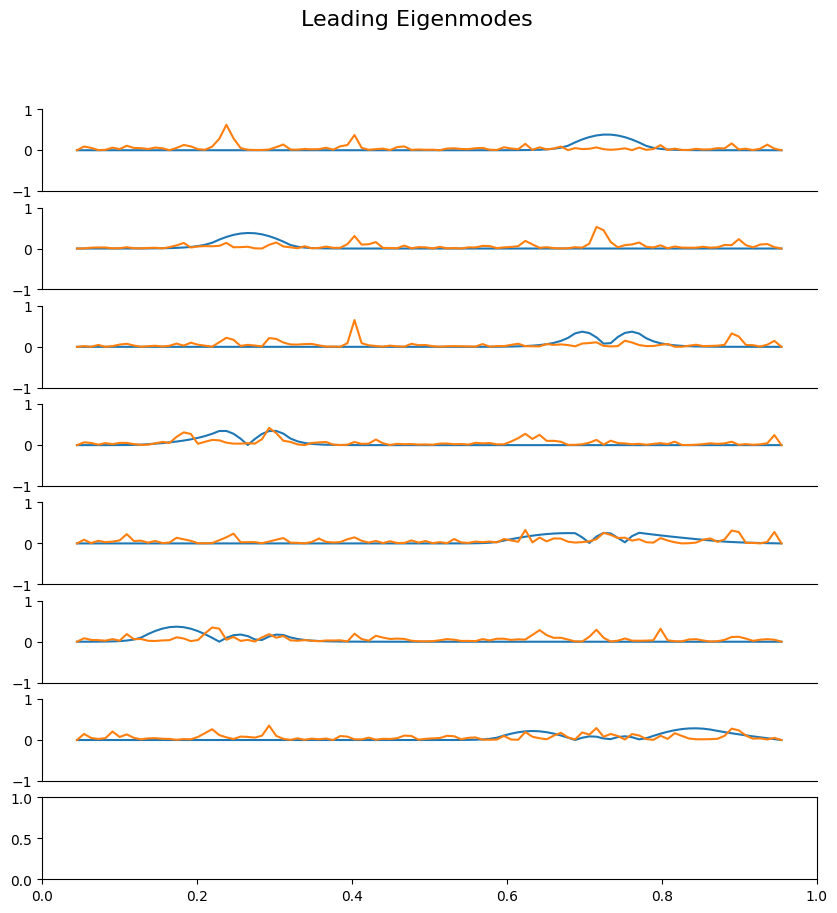

In [925]:
mode_count = 8

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

for i in range(0, mode_count-1):
    ax[i].plot(np.abs(v_plot[i]))
    ax[i].plot(np.abs(v_n_plot[i]))


#     ax[i].plot(np.abs(u_n) / np.abs(u_n).max())
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
fig.suptitle("Leading Eigenmodes", fontsize=16)

Text(0.5, 0.98, 'Lowest Eigenmodes')

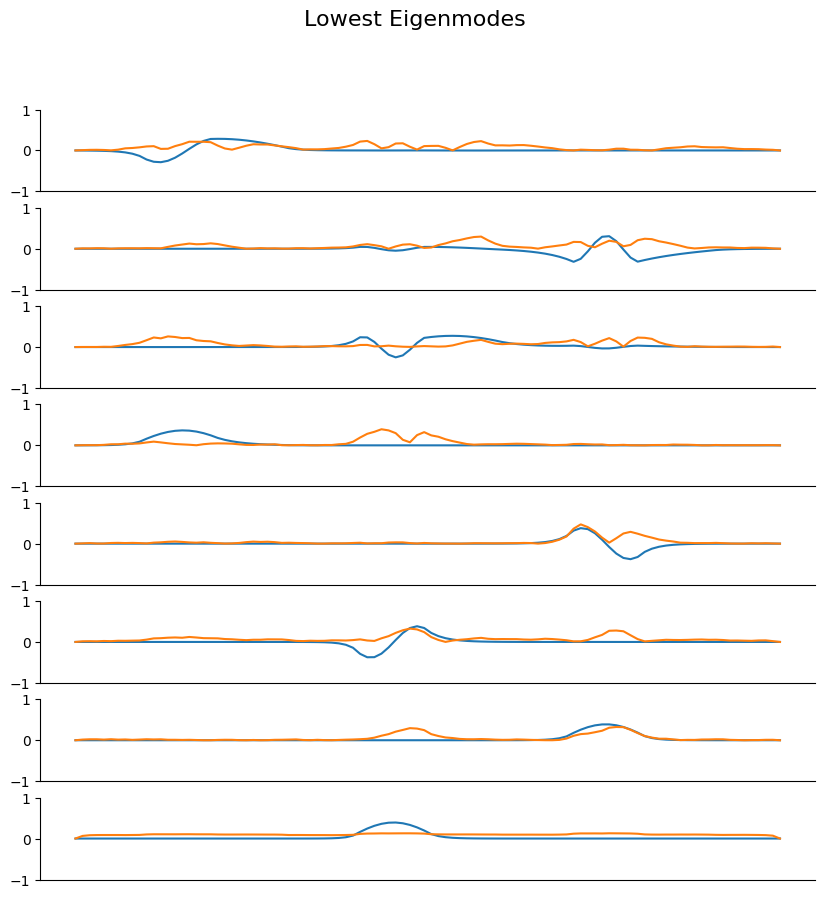

In [504]:
mode_count = 8

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

modes = range(node_count - 2 - mode_count, node_count - 2)

for i, m in enumerate(modes):
    ax[i].plot(v_plot[m])
    ax[i].plot(np.abs(v_n_plot[m]))
    ax[i].set_ylim(-1, 1)
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
fig.suptitle("Lowest Eigenmodes", fontsize=16)

# Block Bond Noise

bonds_per_block: 20
in block 0 have bond max [19 19] min [0 0]
in block 1 have bond max [39 39] min [20 20]
in block 2 have bond max [59 59] min [40 40]
in block 3 have bond max [79 79] min [60 60]
in block 4 have bond max [99 99] min [80 80]


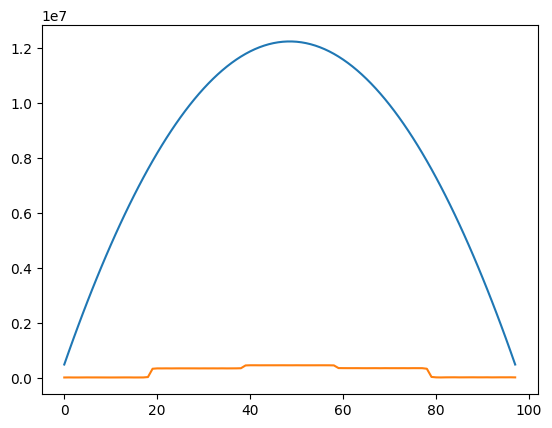

In [598]:
node_count = 100

# potential noise
downsample_factor = 10
potential_noise_max = 1 / node_count ** 2

# bond noise.
bond_downsample_factor = 20
k_noise_max = (1 / node_count ** 2) 
noise_z = int(10)

# Standard gradient.
nn_k = np.ones(node_count - 1) / node_count ** 2
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)

# POTENTIAL NOISE
# Add potential noise\
noise_grid_count = int(node_count / downsample_factor)
noise_vec = np.random.rand(noise_grid_count) * potential_noise_max
noise_vec = noise_vec.repeat(downsample_factor)
potential_noise = np.diag(noise_vec)


# BOND NOISE
k_n = copy.deepcopy(k)

# Add multiple bonds randomly in blocks.
bond_block_count = int(node_count / bond_downsample_factor)
bonds_per_block = int(node_count / bond_block_count)
noise_bond_count_per_block = noise_z * bonds_per_block
print(f"bonds_per_block: {bonds_per_block}")
for b in range(bond_block_count):
    bond_pairs = np.random.randint(0, bonds_per_block, size=(noise_bond_count_per_block, 2))
    
    # Remove self bonds.
    bond_pairs = np.stack([bp for bp in bond_pairs if bp[0]!=bp[1]], axis=0)
    
    # change index to position in `k`
    bond_pairs = bond_pairs + b * bonds_per_block
    print(f"in block {b} have bond max {np.amax(bond_pairs, axis=0)} min {np.amin(bond_pairs, axis=0)}")
    
    # Fixed strength.
    b_strength = np.ones(noise_bond_count) * k_noise_max

    for b, s in zip(bond_pairs, b_strength):
        k_n = add_bond(k_n, b, s, replace=False)

        

# Create force matrix.
M = stiffness_to_force(k) # + potential_noise
M_n = stiffness_to_force(k_n) # + potential_noise

# Boundary conditions.
M = fix_boundary(M)
M_n = fix_boundary(M_n)

# Find eigenvalues.
e, v = linalg.eigh(M)
e_n, v_n = linalg.eigh(M_n)

v= np.pad(v, [[1,1], [0,0]])
v_n= np.pad(v_n, [[1,1], [0,0]])

v_plot = np.transpose(v)
v_n_plot = np.transpose(v_n)
v_difference = np.abs(v_n_plot) - np.abs(v_plot)

# effective valley network.
u = get_valley(M)
u_n = get_valley(M_n)
plt.plot(np.abs(u))
plt.plot(np.abs(u_n))

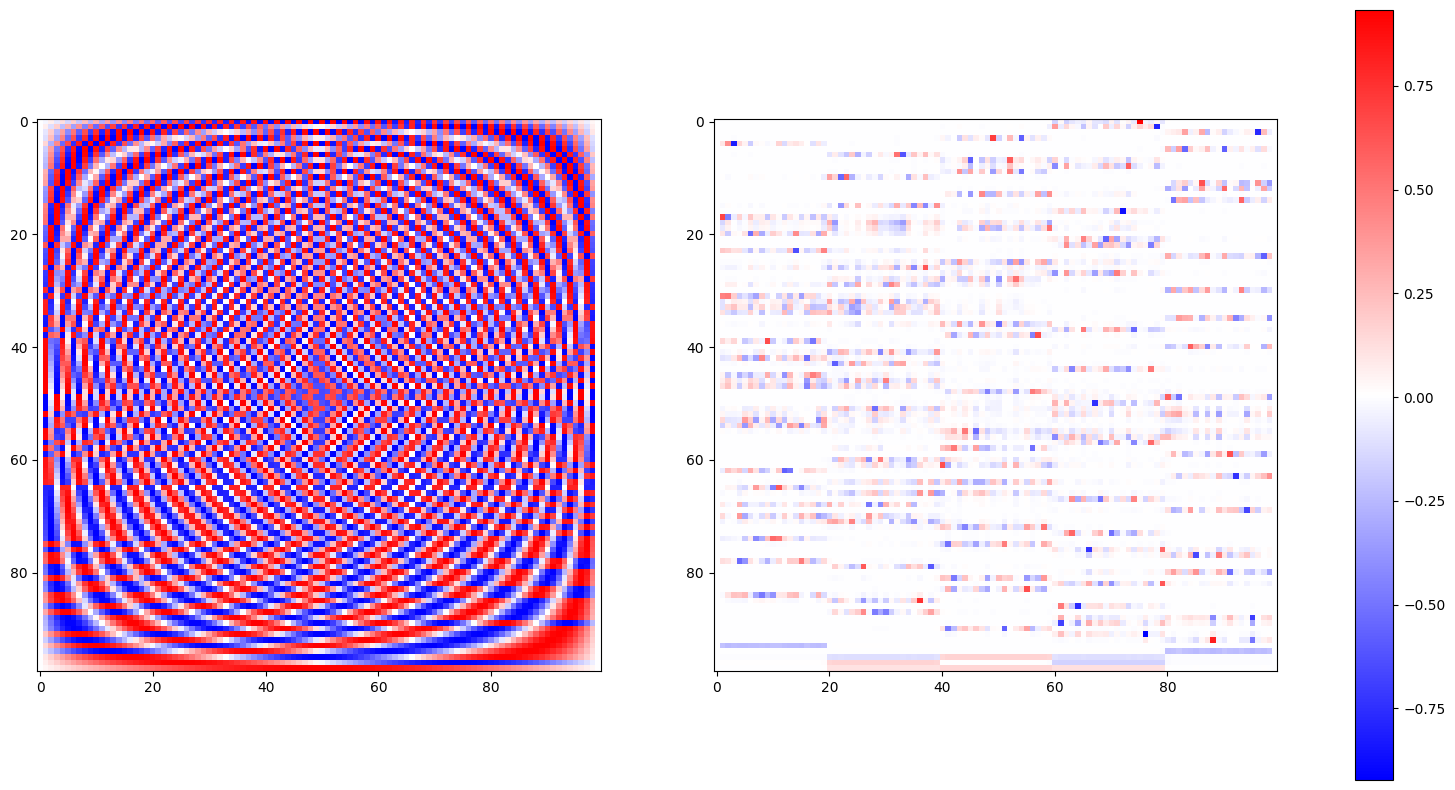

In [599]:

fig, ax = plt.subplots(1, 2, figsize=(20,10))

p = ax[0].imshow(
    v_plot,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
p = ax[1].imshow(
    v_n_plot ,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
fig.colorbar(p, ax=ax)

# for b in bond_pairs:
#     ax.axvline(b[0], color="yellow")
#     ax.axvline(b[1], color="yellow")

Text(0.5, 0.98, 'Leading Eigenmodes')

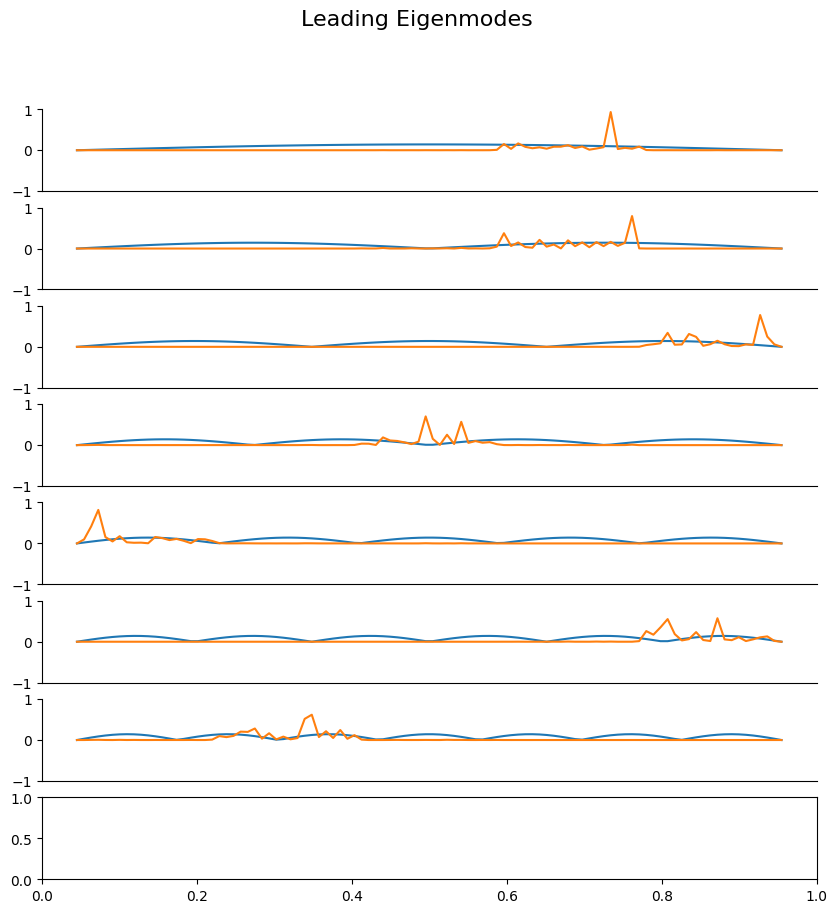

In [600]:
mode_count = 8

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

for i in range(0, mode_count-1):
    ax[i].plot(np.abs(v_plot[i]))
    ax[i].plot(np.abs(v_n_plot[i]))


#     ax[i].plot(np.abs(u_n) / np.abs(u_n).max())
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
fig.suptitle("Leading Eigenmodes", fontsize=16)

# sliding block noise

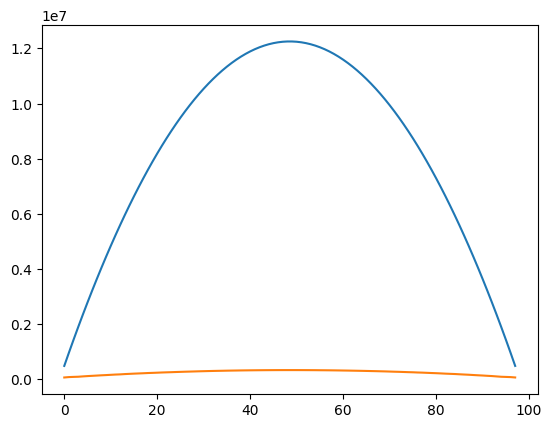

In [629]:
node_count = 100

# potential noise
downsample_factor = 10
potential_noise_max = 1 / node_count ** 2

# bond noise.
bond_downsample_factor = 10
k_noise_max = (1 / node_count ** 2) * .01
noise_z = 1000

# Standard gradient.
nn_k = np.ones(node_count - 1) / node_count ** 2
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)

# POTENTIAL NOISE
# Add potential noise\
noise_grid_count = int(node_count / downsample_factor)
noise_vec = np.random.rand(noise_grid_count) * potential_noise_max
noise_vec = noise_vec.repeat(downsample_factor)
potential_noise = np.diag(noise_vec)


# BOND NOISE
k_n = copy.deepcopy(k)

# Add multiple bonds randomly in blocks.
bond_block_count = int(node_count / bond_downsample_factor)
bonds_per_block = int(node_count / bond_block_count)
half_bonds_per_block = int(bonds_per_block /2)
noise_bond_count_per_block = noise_z * bonds_per_block
z_star = int(noise_z / 2)
for b in range(node_count):
    
    # set valid bonds to connect.
    bond_pair = np.random.randint(-half_bonds_per_block, half_bonds_per_block, size=(z_star))
    
    # change index to position in `k`
    bond_pair = bond_pair + b

    
    # Remove illegal bonds(before/after)
    bond_pair = np.stack([bp for bp in bond_pair if bp>=0 and bp < node_count] , axis=0)
    
    # Remove illegal bonds(bonds w same index)
    bond_pair = np.stack([bp for bp in bond_pair if bp != b] , axis=0)

    # make actual bond pair
    bond_pairs = np.stack([np.ones_like(bond_pair) * b, bond_pair], axis=-1)
    
    # Fixed strength.
    b_strength = np.ones(bond_pairs.shape[0]) * k_noise_max

    for b, s in zip(bond_pairs, b_strength):
        k_n = add_bond(k_n, b, s, replace=False)

        

# Create force matrix.
M = stiffness_to_force(k) # + potential_noise
M_n = stiffness_to_force(k_n) # + potential_noise

# Boundary conditions.
M = fix_boundary(M)
M_n = fix_boundary(M_n)

# Find eigenvalues.
e, v = linalg.eigh(M)
e_n, v_n = linalg.eigh(M_n)

v= np.pad(v, [[1,1], [0,0]])
v_n= np.pad(v_n, [[1,1], [0,0]])

v_plot = np.transpose(v)
v_n_plot = np.transpose(v_n)
v_difference = np.abs(v_n_plot) - np.abs(v_plot)

# effective valley network.
u = get_valley(M)
u_n = get_valley(M_n)
plt.plot(np.abs(u))
plt.plot(np.abs(u_n))

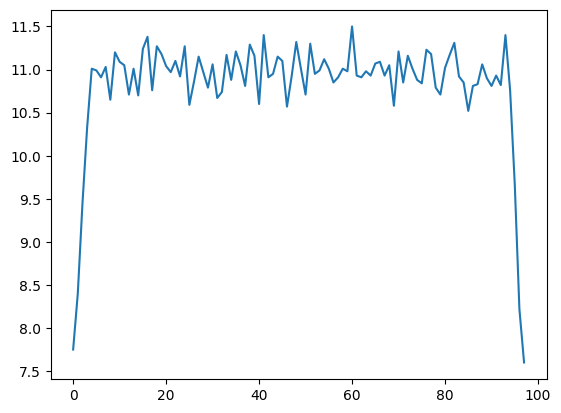

In [630]:
plt.plot(-np.diag(M_n) * node_count ** 2)

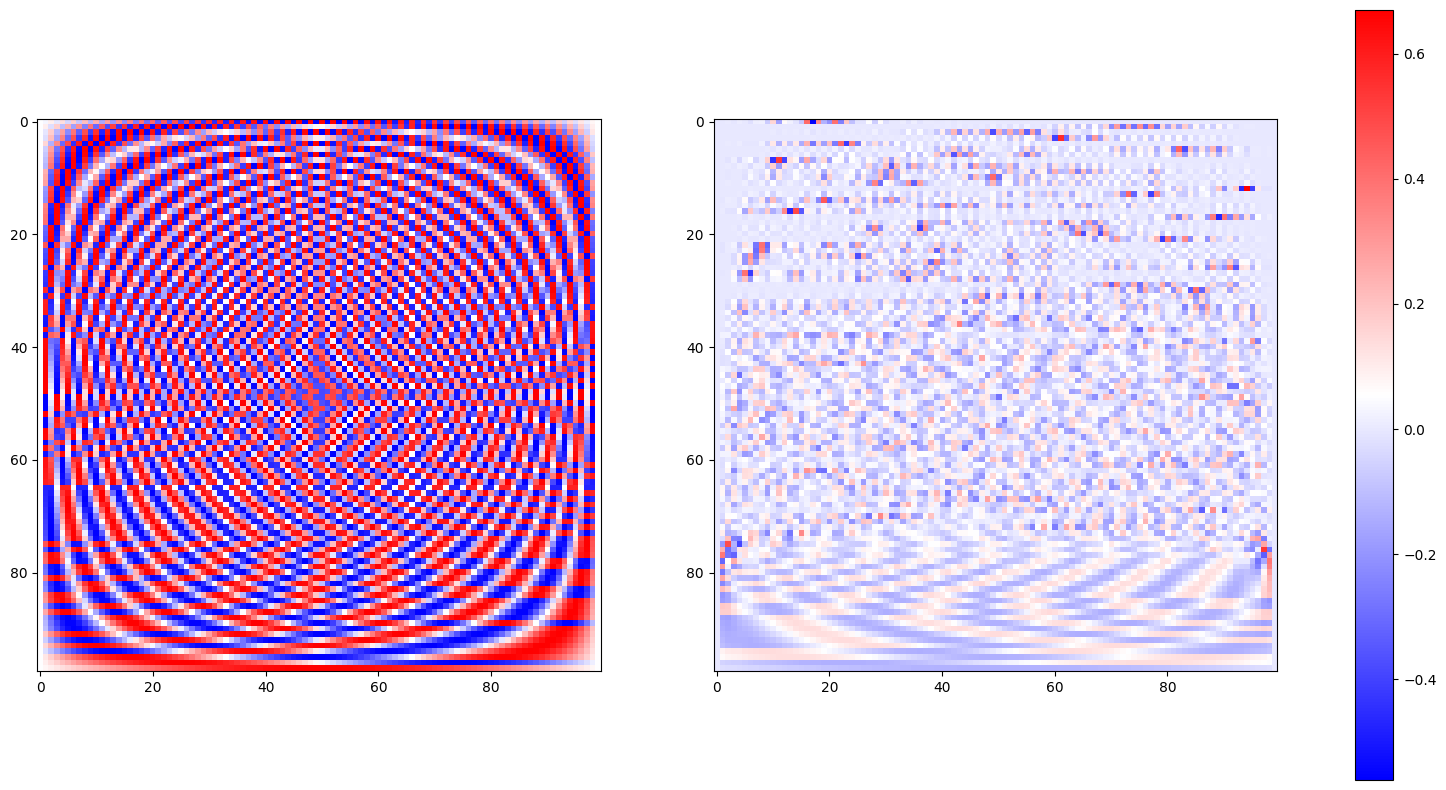

In [631]:

fig, ax = plt.subplots(1, 2, figsize=(20,10))

p = ax[0].imshow(
    v_plot,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
p = ax[1].imshow(
    v_n_plot ,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
fig.colorbar(p, ax=ax)

# for b in bond_pairs:
#     ax.axvline(b[0], color="yellow")
#     ax.axvline(b[1], color="yellow")

Text(0.5, 0.98, 'Leading Eigenmodes')

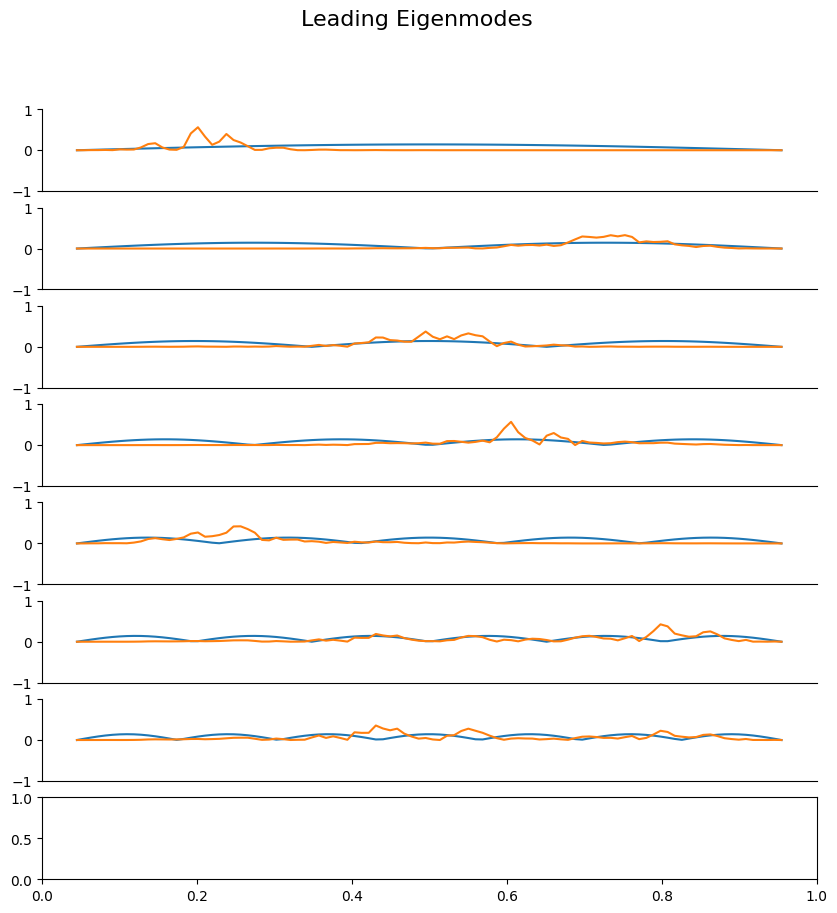

In [632]:
mode_count = 8

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

for i in range(0, mode_count-1):
    ax[i].plot(np.abs(v_plot[i]))
    ax[i].plot(np.abs(v_n_plot[i]))
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
fig.suptitle("Leading Eigenmodes", fontsize=16)

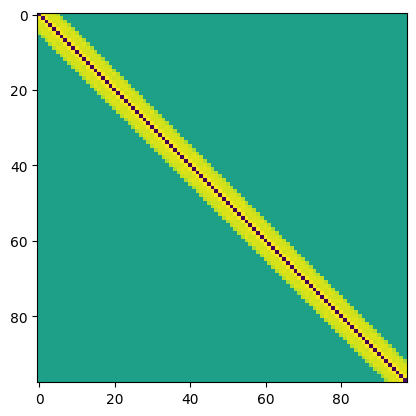

In [634]:
plt.imshow(
    M_n, 
    norm=colors.SymLogNorm(linthresh=1e-5),
)

# Diagonal Noise

In [698]:
def RBM(node_count, W, noise_max):
    k_n = np.zeros([node_count, node_count])
    k_n = np.diag(np.random.rand(node_count) * noise_max)
    for d in range(1, W + 1):
        nn = np.random.rand(node_count  - d) * noise_max
        k_n = k_n + np.diag(nn, d) + np.diag(nn, -d)
    return k_n
    
def RBM_force(node_count, W, noise_max):
    k = RBM(node_count, W, noise_max)
    return stiffness_to_force(k) # + potential_noise




In [699]:
node_count = 500

# bond noise.
W = 20
noise_max= 1.
# noise_max = (1 / node_count ** 2) * 1

# Spectrum statistics.
experiment_count = 100

rbm_s = []
rbm_f = []

for _ in tqdm_notebook(range(experiment_count)):
    
    
    # Create force matrix.
    M = RBM(node_count, W, noise_max)
    M_n = stiffness_to_force(M)

    
    # Boundary conditions.
    M = fix_boundary(M)
    M_n = fix_boundary(M_n)

    # Find eigenvalues.
    e, v = linalg.eigh(M)
    e_n, v_n = linalg.eigh(M_n)

    rbm_s.append(e[0])
    rbm_f.append(e_n[0])







/var/folders/bn/93vnvhxd7vl08z9z7r82dwnw0000gn/T/ipykernel_72382/2330581158.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(experiment_count)):


  0%|          | 0/100 [00:00<?, ?it/s]

(array([ 3.,  5.,  3.,  6., 18., 16., 16., 12., 14.,  7.]),
 array([-28.5998645 , -28.42434629, -28.24882809, -28.07330988,
        -27.89779167, -27.72227347, -27.54675526, -27.37123705,
        -27.19571885, -27.02020064, -26.84468244]),
 <BarContainer object of 10 artists>)

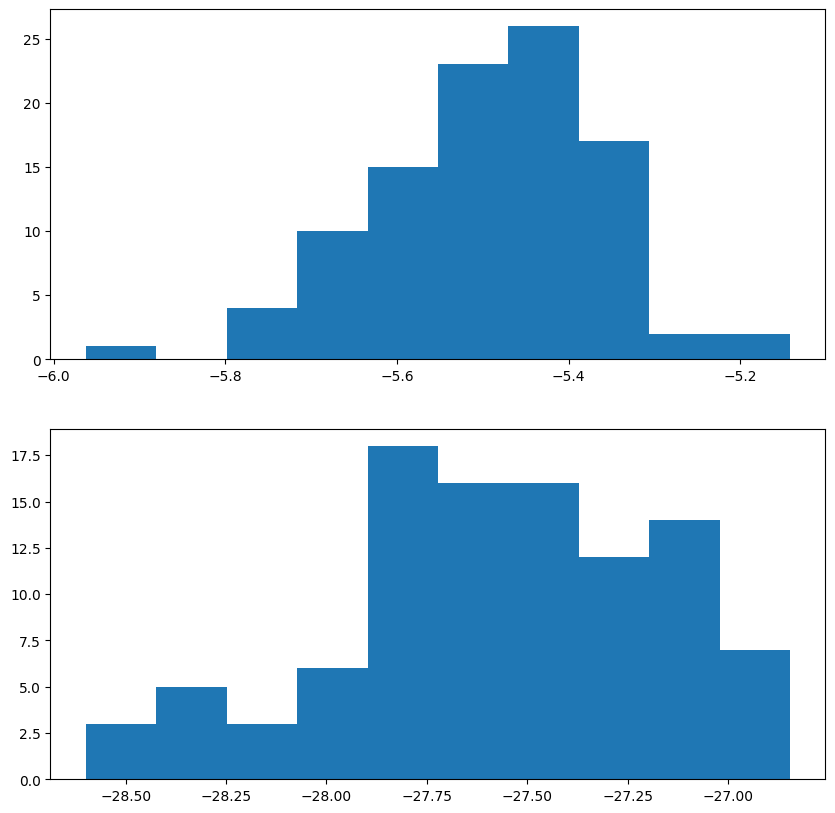

In [700]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].hist(rbm_s, bins = int(experiment_count/10))
ax[1].hist(rbm_f, bins = int(experiment_count/10))

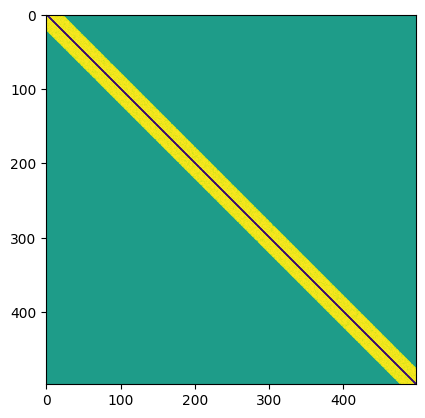

In [697]:
plt.imshow(
    M_n, 
    norm=colors.SymLogNorm(linthresh=1e-5),
)

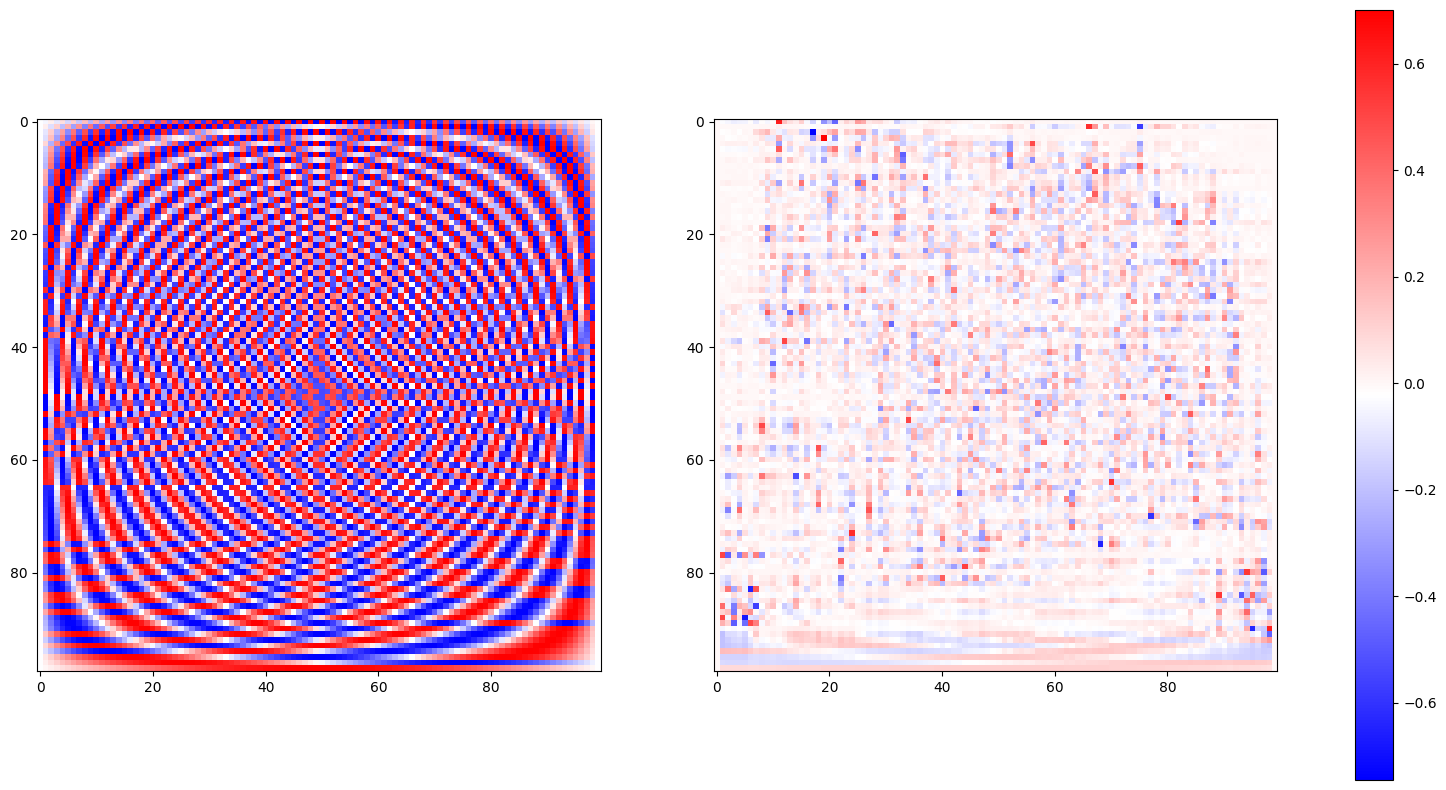

In [666]:

fig, ax = plt.subplots(1, 2, figsize=(20,10))

p = ax[0].imshow(
    v_plot,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
p = ax[1].imshow(
    v_n_plot ,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
fig.colorbar(p, ax=ax)

# for b in bond_pairs:
#     ax.axvline(b[0], color="yellow")
#     ax.axvline(b[1], color="yellow")|

# animate

In [820]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation

In [814]:
%matplotlib inline
# %matplotlib notebook

In [1661]:
node_count = 10
nn_k = np.ones(node_count + 1)
k = np.diag(nn_k, 1) + np.diag(nn_k, -1)

# # Add bonds
# bond_pair = np.array([10, 20])
# k = add_bond(k, bond_pair, k_noise)

# # symmetric
# symmetric_bond_pair = node_count - bond_pair
# k = add_bond(k, symmetric_bond_pair, k_noise)

# # Add multiple bonds randomly

# k_noise = 1
# noise_z = node_count * 2
# noise_bond_count = noise_z * node_count
# bond_pairs = np.random.randint(0, node_count+1, size=(noise_bond_count, 2))
# # strength = np.random.rand(noise_bond_count) * k_noise

# for b, s in zip(bond_pairs, strength):
#     k = add_bond(k, b, k_noise, replace=False)


# Create force matrix.
M = stiffness_to_force(k)
M = fix_boundary(M)

# Find eigenvalues.
e, v = linalg.eigh(M)

v= np.pad(v, [[1,1], [0,0]])

omega = np.sqrt(np.abs(e))

v_plot = np.transpose(v)

o_min = omega.min()

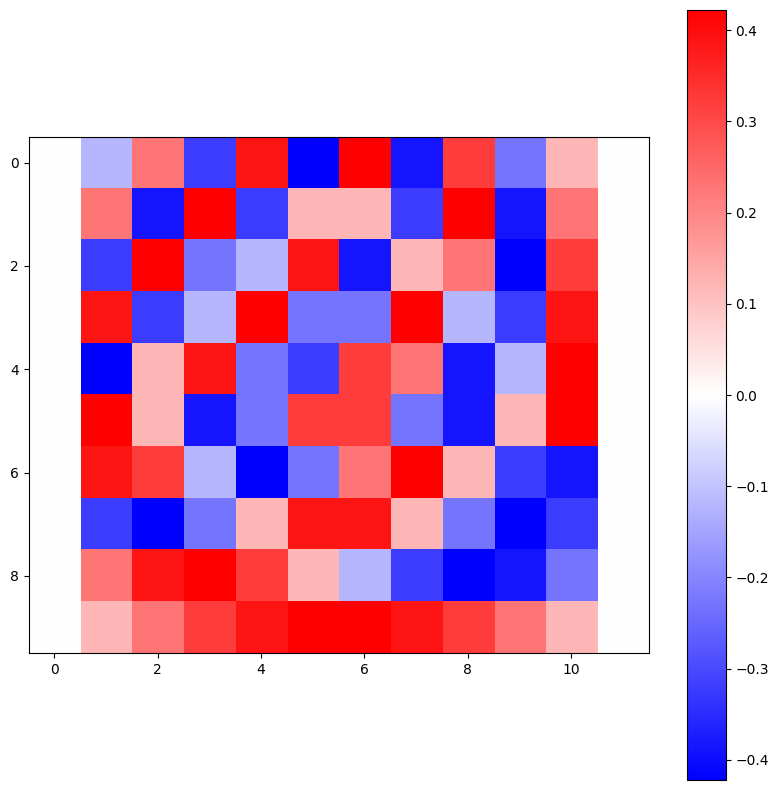

In [1662]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

p = ax.imshow(
    v_plot,
#     norm=colors.SymLogNorm(linthresh=.001),
    cmap='bwr',
)
fig.colorbar(p, ax=ax)


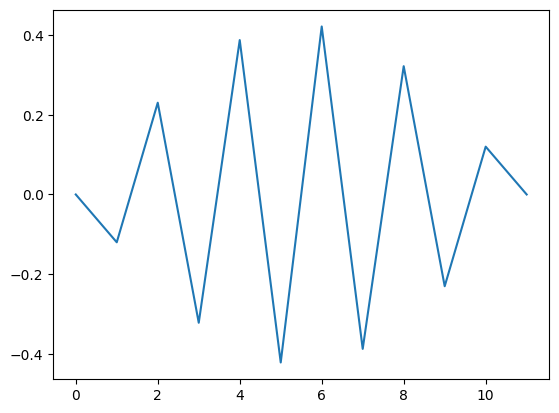

In [1663]:
plt.plot(v_plot[0])

Text(0.5, 0.98, 'Norm of eigenmodes')

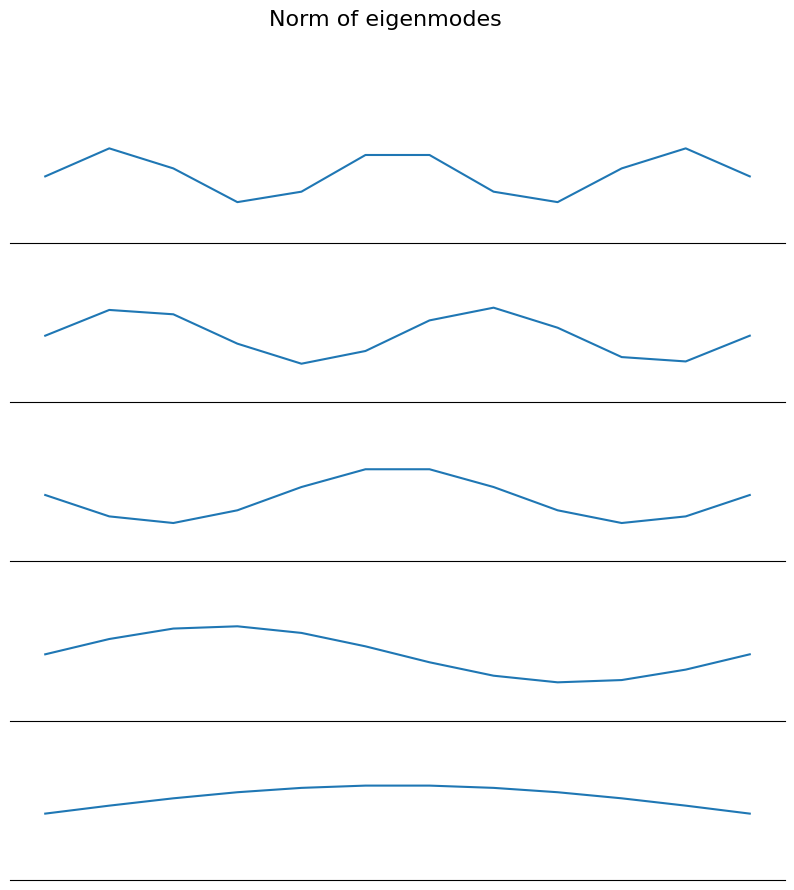

In [1666]:
mode_count = 5

fig, ax = plt.subplots(mode_count, 1, figsize=(10,10))

for i in range(0, mode_count):
    ax[i].plot(v_plot[i + 5])
    ax[i].set_ylim(-1, 1)
    ax[i].tick_params(
    axis='x',          
    which='both',     
    bottom=False,    
    top=False,         
    labelbottom=False
    ) 
    ax[i].tick_params(
    axis='y',          
    which='both',     
    left=False,    
    right=False,         
    labelleft=False
    ) 
    ax[i].spines.right.set_visible(False)
    ax[i].spines.top.set_visible(False)
    ax[i].spines.left.set_visible(False)


fig.suptitle("Norm of eigenmodes", fontsize=16)

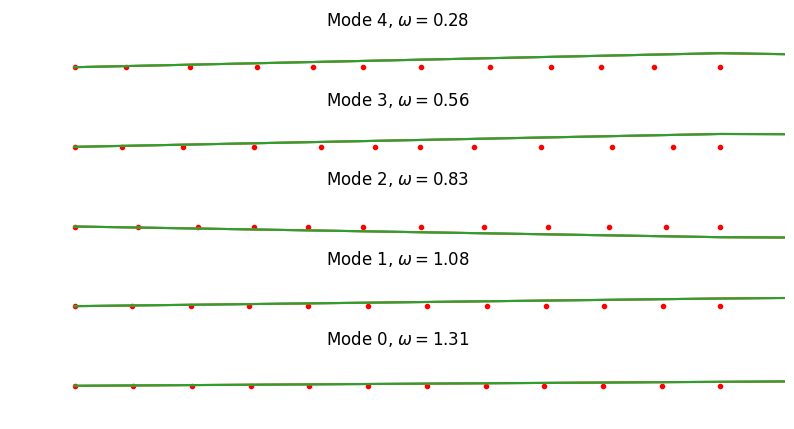

In [1665]:
mode_count = 5

x0 = np.linspace(0, 1, node_count + 2)
y0 = np.zeros(node_count + 2)
v =  v_plot[-mode_count :] / (node_count + 1) / 2
o = omega[-mode_count :]

fig, ax = plt.subplots(mode_count, 1, figsize=(10, 5))

# initialize plotting for each spring.
nodes = [a.plot([], [], 'ro', ms=3)[0] for a in ax]

def init():
    for i, a in enumerate(ax):
        a.set_xlim(-.1, 1.1)
        a.set_ylim(-1, 1)
        a.set_axis_off()
        a.set_title(f"Mode {4 - i}, $\omega = {o[4-i]:.2f}$")
        a.plot(v_plot[i + 5])
    return nodes

def update(i):
    u = np.sin(2 * np.pi * i * o / o_min)[:, np.newaxis] * v
    for n, u_ in zip(nodes, u):
        n.set_data(x0 + u_, y0)
    return nodes


fps = 30
anim = FuncAnimation(fig, update, frames=np.linspace(0,1,48), interval = 500/fps,
                    init_func=init, blit=True)

f = figure_directory.joinpath("mode_animation.mp4")
writervideo = animation.FFMpegWriter(fps=24)
anim.save(f, writer=writervideo)

# Localization test.

In [266]:
# 3D barplot
fig = plt.figure(figsize=(3, 3))
ax1 = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.linspace(0, 1, node_count), np.linspace(0, 1, node_count))
zz = np.zeros_like(yy)

x_ = y_ = 1 / node_count / 1.1

# color
norm = colors.Normalize(k_noise.min(), k_noise.max())
c = cm.jet(norm(k_noise))

ax1.bar3d(xx.ravel(), yy.ravel(), zz.ravel(), x_, y_, k_noise.ravel(), color=c.reshape([-1, 4]))